In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
get_ipython().magic(u'matplotlib inline')
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from scipy import stats
from pandasql import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
dataset=pd.read_csv('trades_count_regression_2016-11-18.txt', sep='\t')
dataset.head()

ProductName    Maturity        Date  TimeToMaturity DayOfTheWeek  \
0          6E  2016-06-13  2016-05-02              42          Mon   
1          6E  2016-06-13  2016-05-03              41          Tue   
2          6E  2016-06-13  2016-05-04              40          Wed   
3          6E  2016-06-13  2016-05-05              39          Thu   
4          6E  2016-06-13  2016-05-06              38          Fri   

   DayofMonth ProductType  Day  DayTradeTotal  TradeTotBCTrans  \
0           2          FX    1         105173        17.034718   
1           3          FX    2         137646        17.598158   
2           4          FX    3         135657        17.567433   
3           5          FX    4         126798        17.425248   
4           6          FX    5         147658        17.746765   

   TradeTotLogTrans  
0         11.563362  
1         11.832440  
2         11.817885  
3         11.750351  
4         11.902654

In [3]:
dataset.shape

(8826, 11)

In [4]:
q='''select ProductType, ProductName, Date, Day, DayofMonth, sum(DayTradeTotal) DayTradeTotal 
    from dataset 
    group by ProductType, ProductName, Date, Day, DayofMonth;'''

df = sqldf(q, locals())
df.head()

ProductType ProductName        Date  Day  DayofMonth  DayTradeTotal
0         Agr          KE  2016-05-02    1           2           1668
1         Agr          KE  2016-05-03    2           3          20603
2         Agr          KE  2016-05-05    4           5          17434
3         Agr          KE  2016-05-06    5           6          10559
4         Agr          KE  2016-05-10    7          10          19680

In [13]:
df['TradeTotBCTrans']=stats.boxcox(df['DayTradeTotal'])[0]
df.head()

ProductType ProductName        Date  Day  DayofMonth  DayTradeTotal  \
0         Agr          KE  2016-05-02    1           2           1668   
1         Agr          KE  2016-05-03    2           3          20603   
2         Agr          KE  2016-05-05    4           5          17434   
3         Agr          KE  2016-05-06    5           6          10559   
4         Agr          KE  2016-05-10    7          10          19680   

   TradeTotBCTrans  
0        15.097688  
1        26.485093  
2        25.565271  
3        22.958210  
4        26.230011

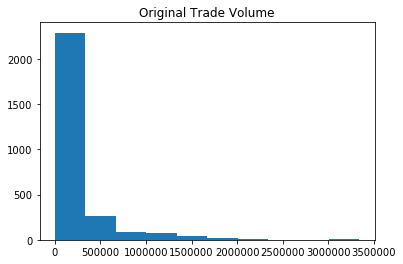

In [261]:
plt.hist(df['DayTradeTotal']); plt.title("Original Trade Volume");
plt.savefig('strata_noMat_skewHist.png', bbox_inches='tight') 

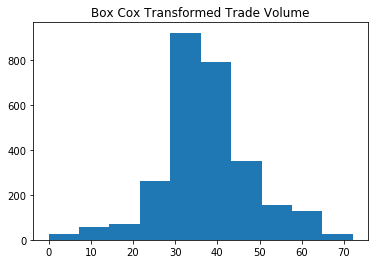

In [262]:
plt.hist(df['TradeTotBCTrans']); plt.title("Box Cox Transformed Trade Volume");
plt.savefig('strata_noMat_Hist.png', bbox_inches='tight') 

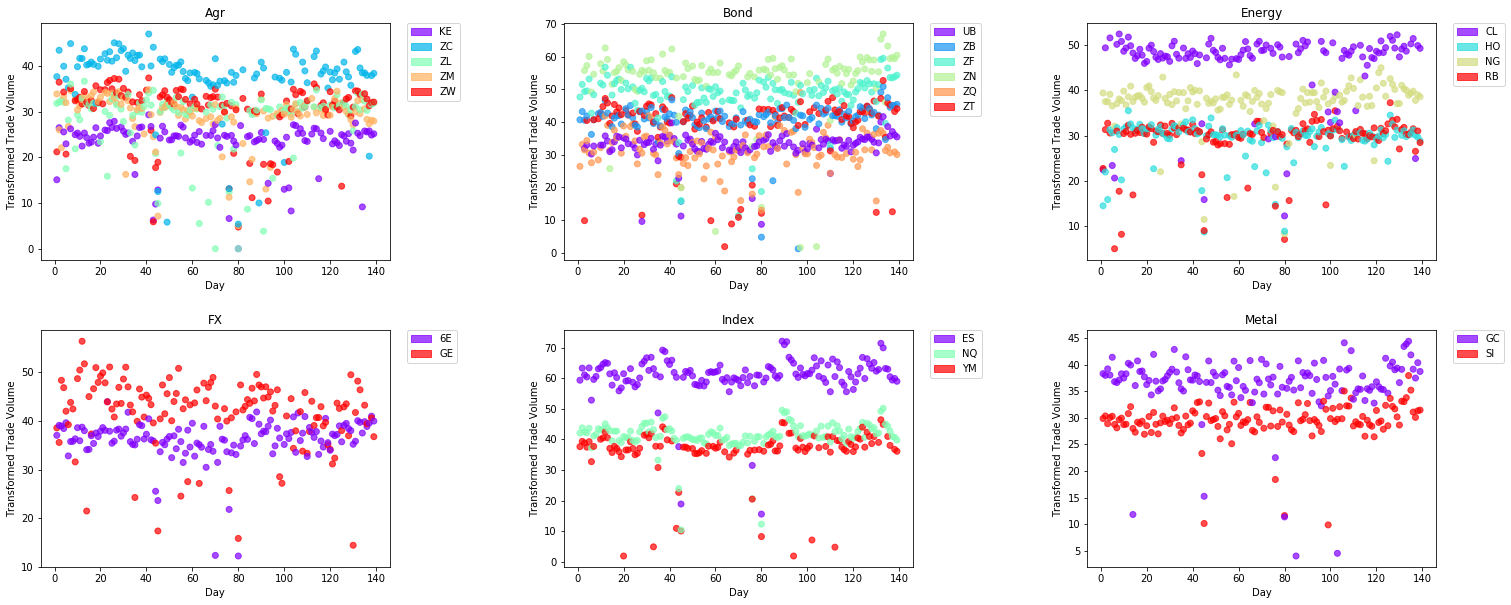

In [275]:
trans=.7  #edgecolor='none'
plt.figure(figsize=(25, 10))

for j, i in enumerate(np.unique(df.ProductType)):
    subset=df.loc[df.ProductType==i]
    subset=subset.sort_values(by="Day")
    uCols=np.unique(subset.ProductName)
    labs=[np.unique(subset.ProductName).tolist().index(k) for k in subset.ProductName]
    plt.subplot(2,3,j+1);
    plt.subplots_adjust(hspace=.3);
    plt.subplots_adjust(wspace=.5);
    plt.scatter(subset[['Day']], subset[['TradeTotBCTrans']], c=labs, cmap=cm.rainbow, alpha=trans); 
    plt.xlabel('Day'); plt.ylabel('Transformed Trade Volume');
    #plt.plot(subset[['Day']], subset[['TradeTotBCTrans']], 'tab:gray', alpha=trans)
    plt.title(i);

    cust_hand=[]
    for j in range(len(uCols)):
        cust_hand.append(mpatches.Patch(color=cm.rainbow(np.linspace(0, 1, len(uCols))[j], alpha=trans), label=uCols[j]))
    plt.legend(handles=cust_hand, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('strata_day_noMat.png', bbox_inches='tight') 

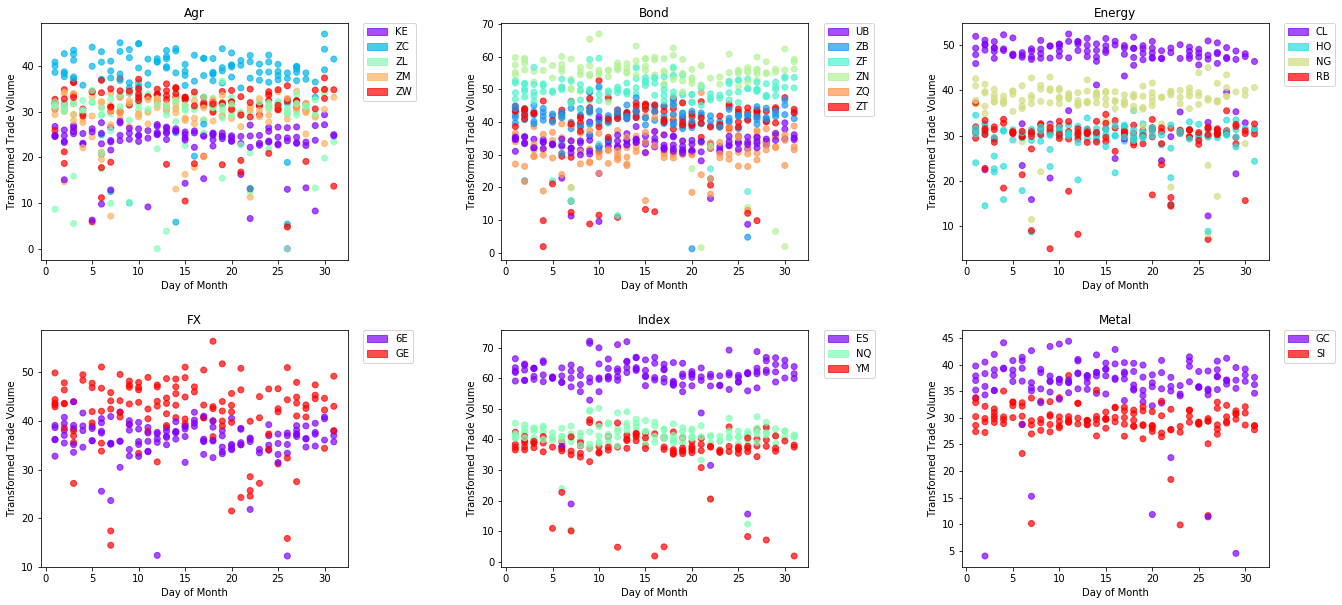

In [274]:
trans=.7  #edgecolor='none'
plt.figure(figsize=(22, 10))

for j, i in enumerate(np.unique(df.ProductType)):
    subset=df.loc[df.ProductType==i]
    subset=subset.sort_values(by="DayofMonth")
    uCols=np.unique(subset.ProductName)
    labs=[np.unique(subset.ProductName).tolist().index(k) for k in subset.ProductName]
    plt.subplot(2,3,j+1);
    plt.subplots_adjust(hspace=.3);
    plt.subplots_adjust(wspace=.5);
    plt.scatter(subset[['DayofMonth']], subset[['TradeTotBCTrans']], c=labs, cmap=cm.rainbow, alpha=trans); 
    plt.xlabel('Day of Month'); plt.ylabel('Transformed Trade Volume');
    #plt.plot(subset[['DayofMonth']], subset[['TradeTotBCTrans']], 'tab:gray', alpha=trans)
    plt.title(i);

    cust_hand=[]
    for j in range(len(uCols)):
        cust_hand.append(mpatches.Patch(color=cm.rainbow(np.linspace(0, 1, len(uCols))[j], alpha=trans), label=uCols[j]))
    plt.legend(handles=cust_hand, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('strata_day_of_mo_noMat.png', bbox_inches='tight') 

In [237]:
import matplotlib.pyplot as plt

In [136]:
subset=dataset.loc[dataset.ProductType=='Agr']
subset.head()

ProductName    Maturity        Date  TimeToMaturity DayOfTheWeek  \
2834          KE  2016-05-13  2016-05-05               8          Thu   
2835          KE  2016-05-13  2016-05-06               7          Fri   
2836          KE  2016-05-13  2016-05-10               3          Tue   
2837          KE  2016-07-14  2016-05-03              72          Tue   
2838          KE  2016-07-14  2016-05-05              70          Thu   

      DayofMonth ProductType  Day  DayTradeTotal  TradeTotBCTrans  \
2834           5         Agr    4              4         1.448814   
2835           6         Agr    5              2         0.708548   
2836          10         Agr    7              3         1.137636   
2837           3         Agr    2          18106        13.577599   
2838           5         Agr    4          14651        13.186857   

      TradeTotLogTrans  
2834          1.386294  
2835          0.693147  
2836          1.098612  
2837          9.803999  
2838          9.592264

In [137]:
subset=subset.loc[subset.ProductName=='ZC']
subset.tail()

ProductName    Maturity        Date  TimeToMaturity DayOfTheWeek  \
6275          ZC  2017-05-12  2016-11-14             179          Mon   
6276          ZC  2017-05-12  2016-11-15             178          Tue   
6277          ZC  2017-05-12  2016-11-16             177          Wed   
6278          ZC  2017-05-12  2016-11-17             176          Thu   
6279          ZC  2017-05-12  2016-11-18             175          Fri   

      DayofMonth ProductType  Day  DayTradeTotal  TradeTotBCTrans  \
6275          14         Agr  135           6044        11.608304   
6276          15         Agr  136           6582        11.756513   
6277          16         Agr  137           5963        11.584927   
6278          17         Agr  138           6675        11.780976   
6279          18         Agr  139           5650        11.491704   

      TradeTotLogTrans  
6275          8.706821  
6276          8.792094  
6277          8.693329  
6278          8.806124  
6279          8.639411

In [83]:
len(np.unique(dataset.ProductName))

22

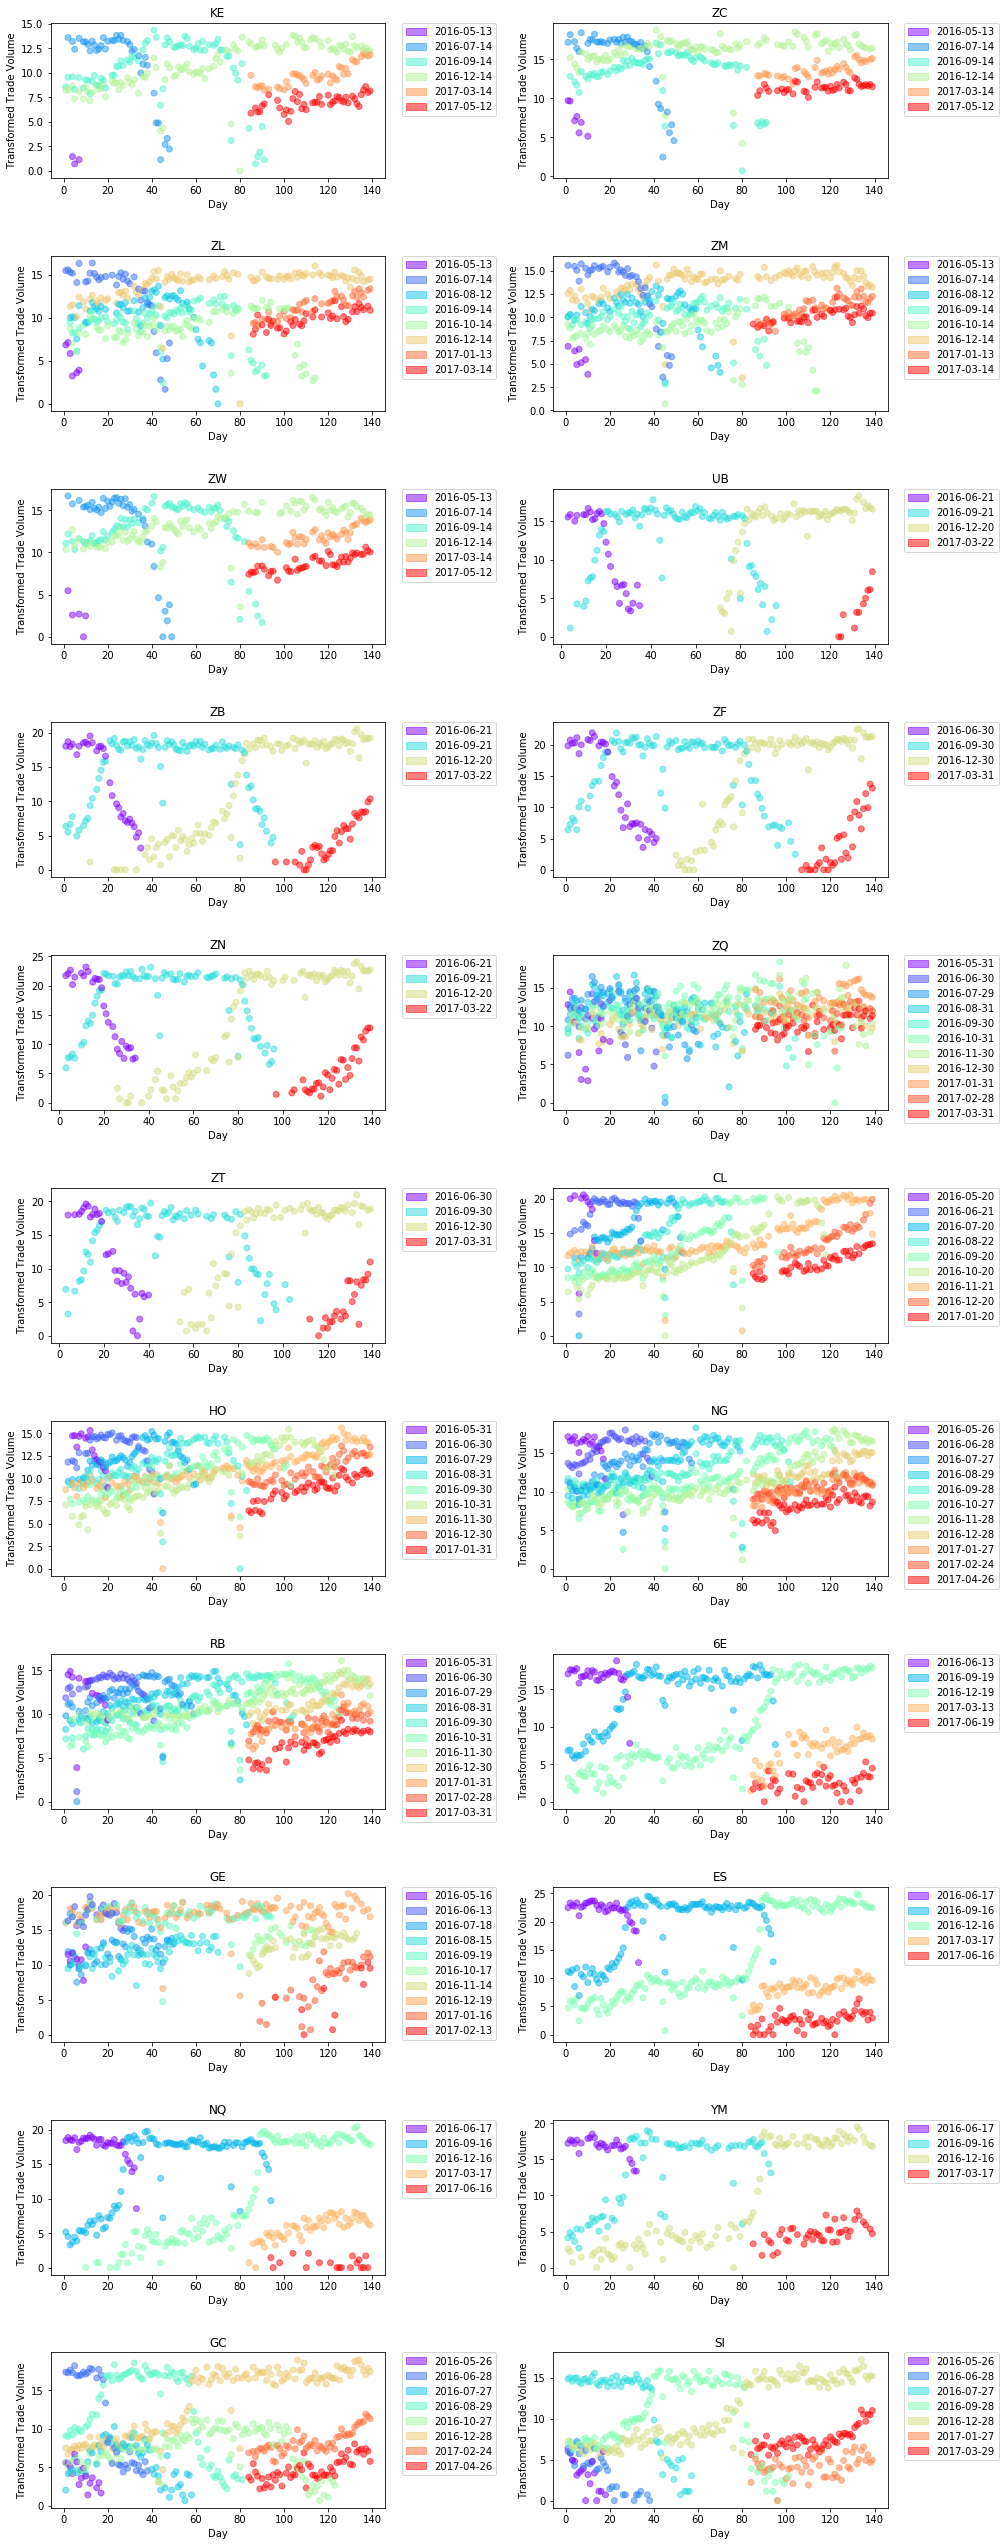

In [273]:
#plots highlighting maturities?
trans=.5  #edgecolor='none'
plt.figure(figsize=(15, 50))

j=0
for i in np.unique(dataset.ProductType):
    subset0=dataset.loc[dataset.ProductType==i]
    for l in np.unique(subset0.ProductName):
        subset=subset0.loc[subset0.ProductName==l]
        subset=subset.sort_values(by="Day") #not needed since not line grapg
        j=j+1
        plt.subplot(12, 2, j); #np.ceil(len(np.unique(subset.Maturity))/3.0)
        plt.subplots_adjust(hspace=.5);
        plt.subplots_adjust(wspace=.5);
        labs=[np.unique(subset.Maturity).tolist().index(k) for k in subset.Maturity]
        plt.scatter(subset[['Day']], subset[['TradeTotBCTrans']], c=labs, cmap=cm.rainbow, alpha=trans); 
        plt.xlabel('Day'); plt.ylabel('Transformed Trade Volume');
        #plt.plot(subset[['DayofMonth']], subset[['TradeTotBCTrans']], 'tab:gray', alpha=trans)
        plt.title(l);
        
        uCols=np.unique(subset.Maturity)
        cust_hand=[]
        for m in range(len(uCols)):
            cust_hand.append(mpatches.Patch(color=cm.rainbow(np.linspace(0, 1, len(uCols))[m], alpha=trans), label=uCols[m]))
        plt.legend(handles=cust_hand, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('strata_day_Mat.png', bbox_inches='tight') 

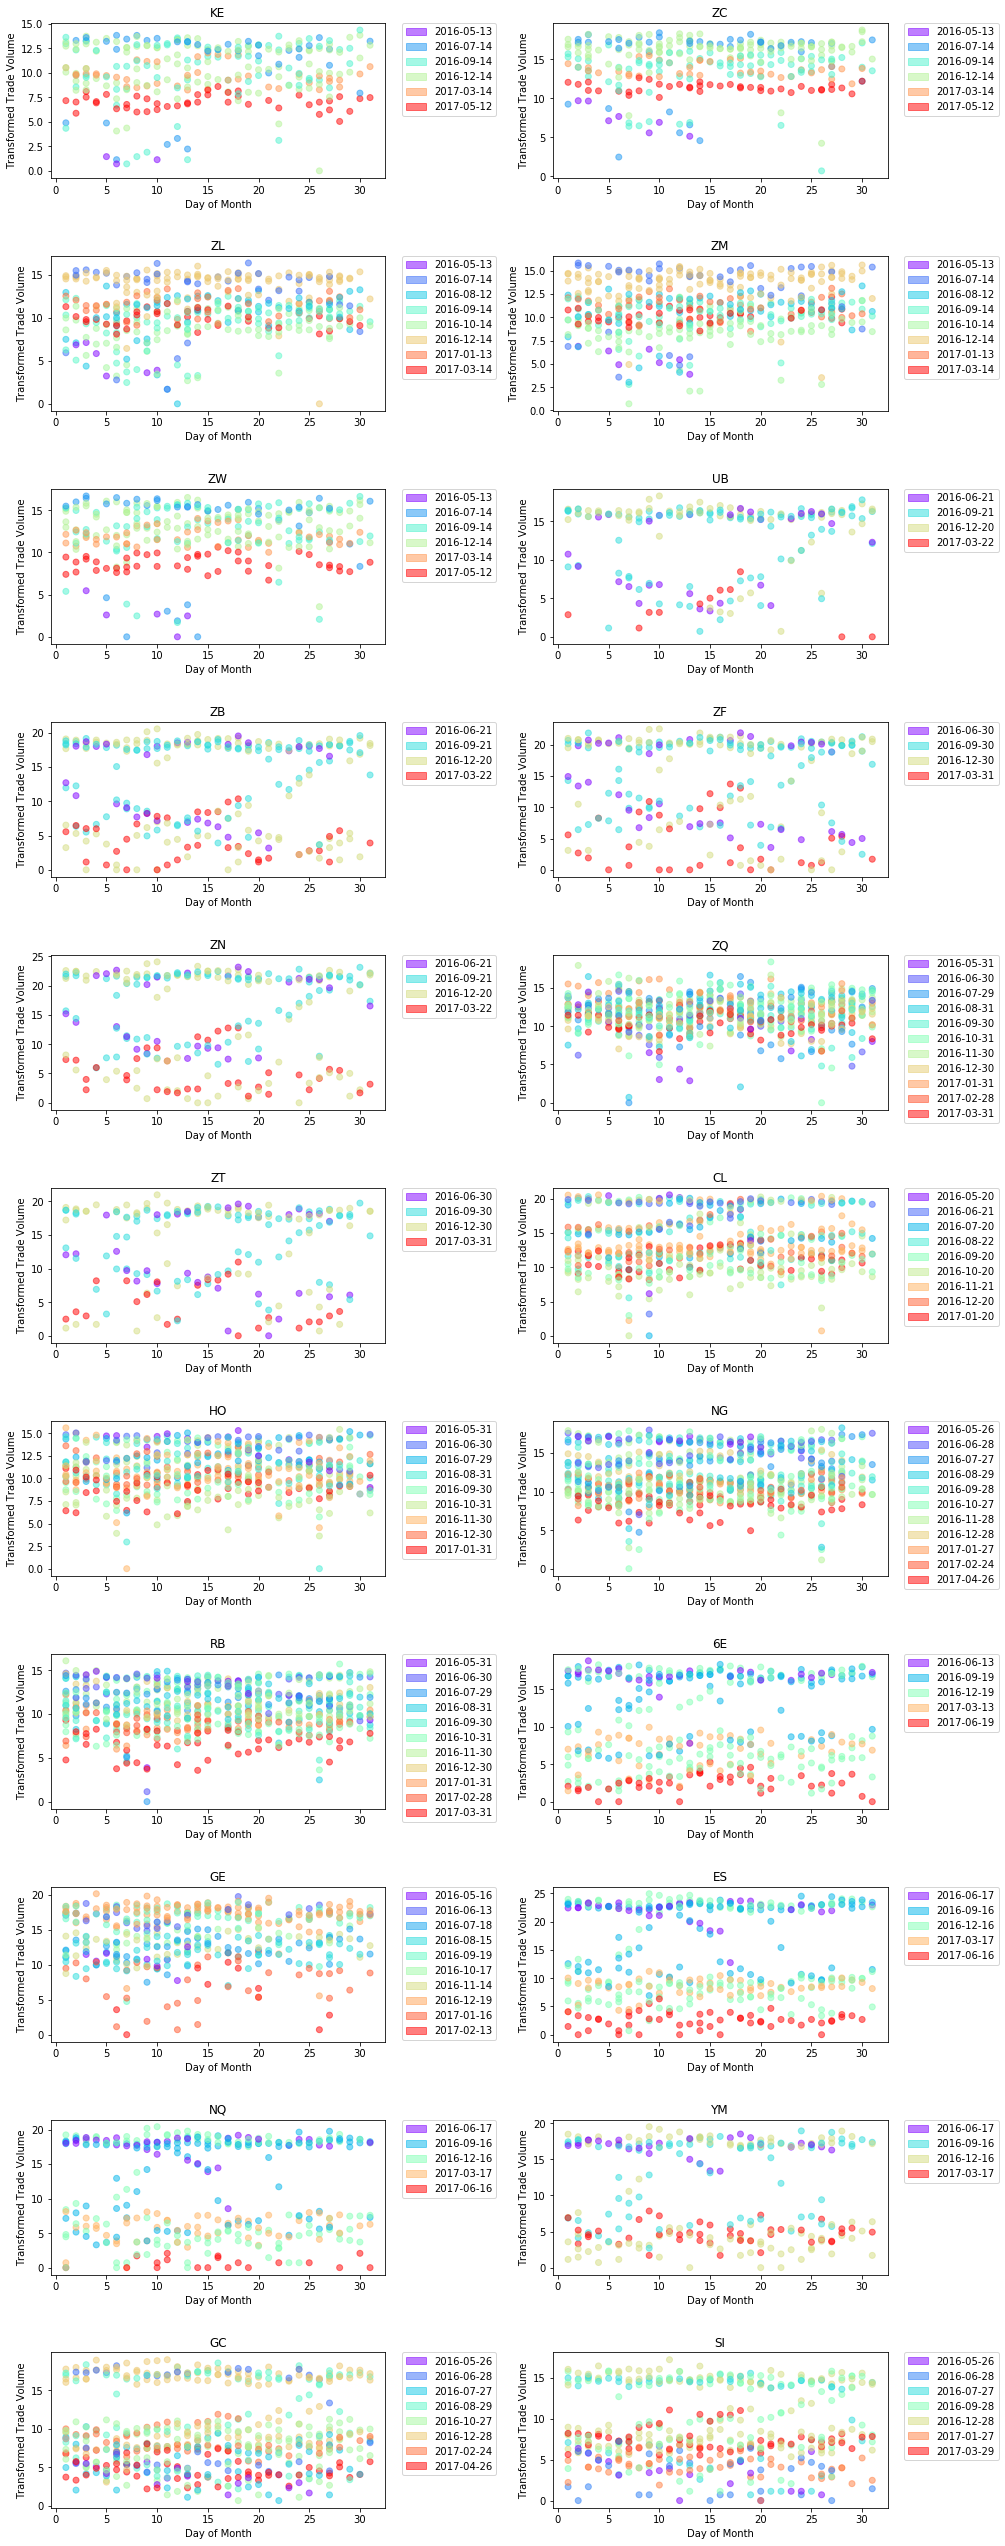

In [272]:
#plots highlighting maturities?
trans=.5  #edgecolor='none'
plt.figure(figsize=(15, 50))

j=0
for i in np.unique(dataset.ProductType):
    subset0=dataset.loc[dataset.ProductType==i]
    for l in np.unique(subset0.ProductName):
        subset=subset0.loc[subset0.ProductName==l]
        subset=subset.sort_values(by="DayofMonth") #not needed since not line grapg
        j=j+1
        plt.subplot(12, 2, j); #np.ceil(len(np.unique(subset.Maturity))/3.0)
        plt.subplots_adjust(hspace=.5);
        plt.subplots_adjust(wspace=.5);
        labs=[np.unique(subset.Maturity).tolist().index(k) for k in subset.Maturity]
        plt.scatter(subset[['DayofMonth']], subset[['TradeTotBCTrans']], c=labs, cmap=cm.rainbow, alpha=trans); 
        plt.xlabel('Day of Month'); plt.ylabel('Transformed Trade Volume');
        #plt.plot(subset[['DayofMonth']], subset[['TradeTotBCTrans']], 'tab:gray', alpha=trans)
        plt.title(l);
        
        uCols=np.unique(subset.Maturity)
        cust_hand=[]
        for m in range(len(uCols)):
            cust_hand.append(mpatches.Patch(color=cm.rainbow(np.linspace(0, 1, len(uCols))[m], alpha=trans), label=uCols[m]))
        plt.legend(handles=cust_hand, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('strata_dayOfMo_Mat.png', bbox_inches='tight')

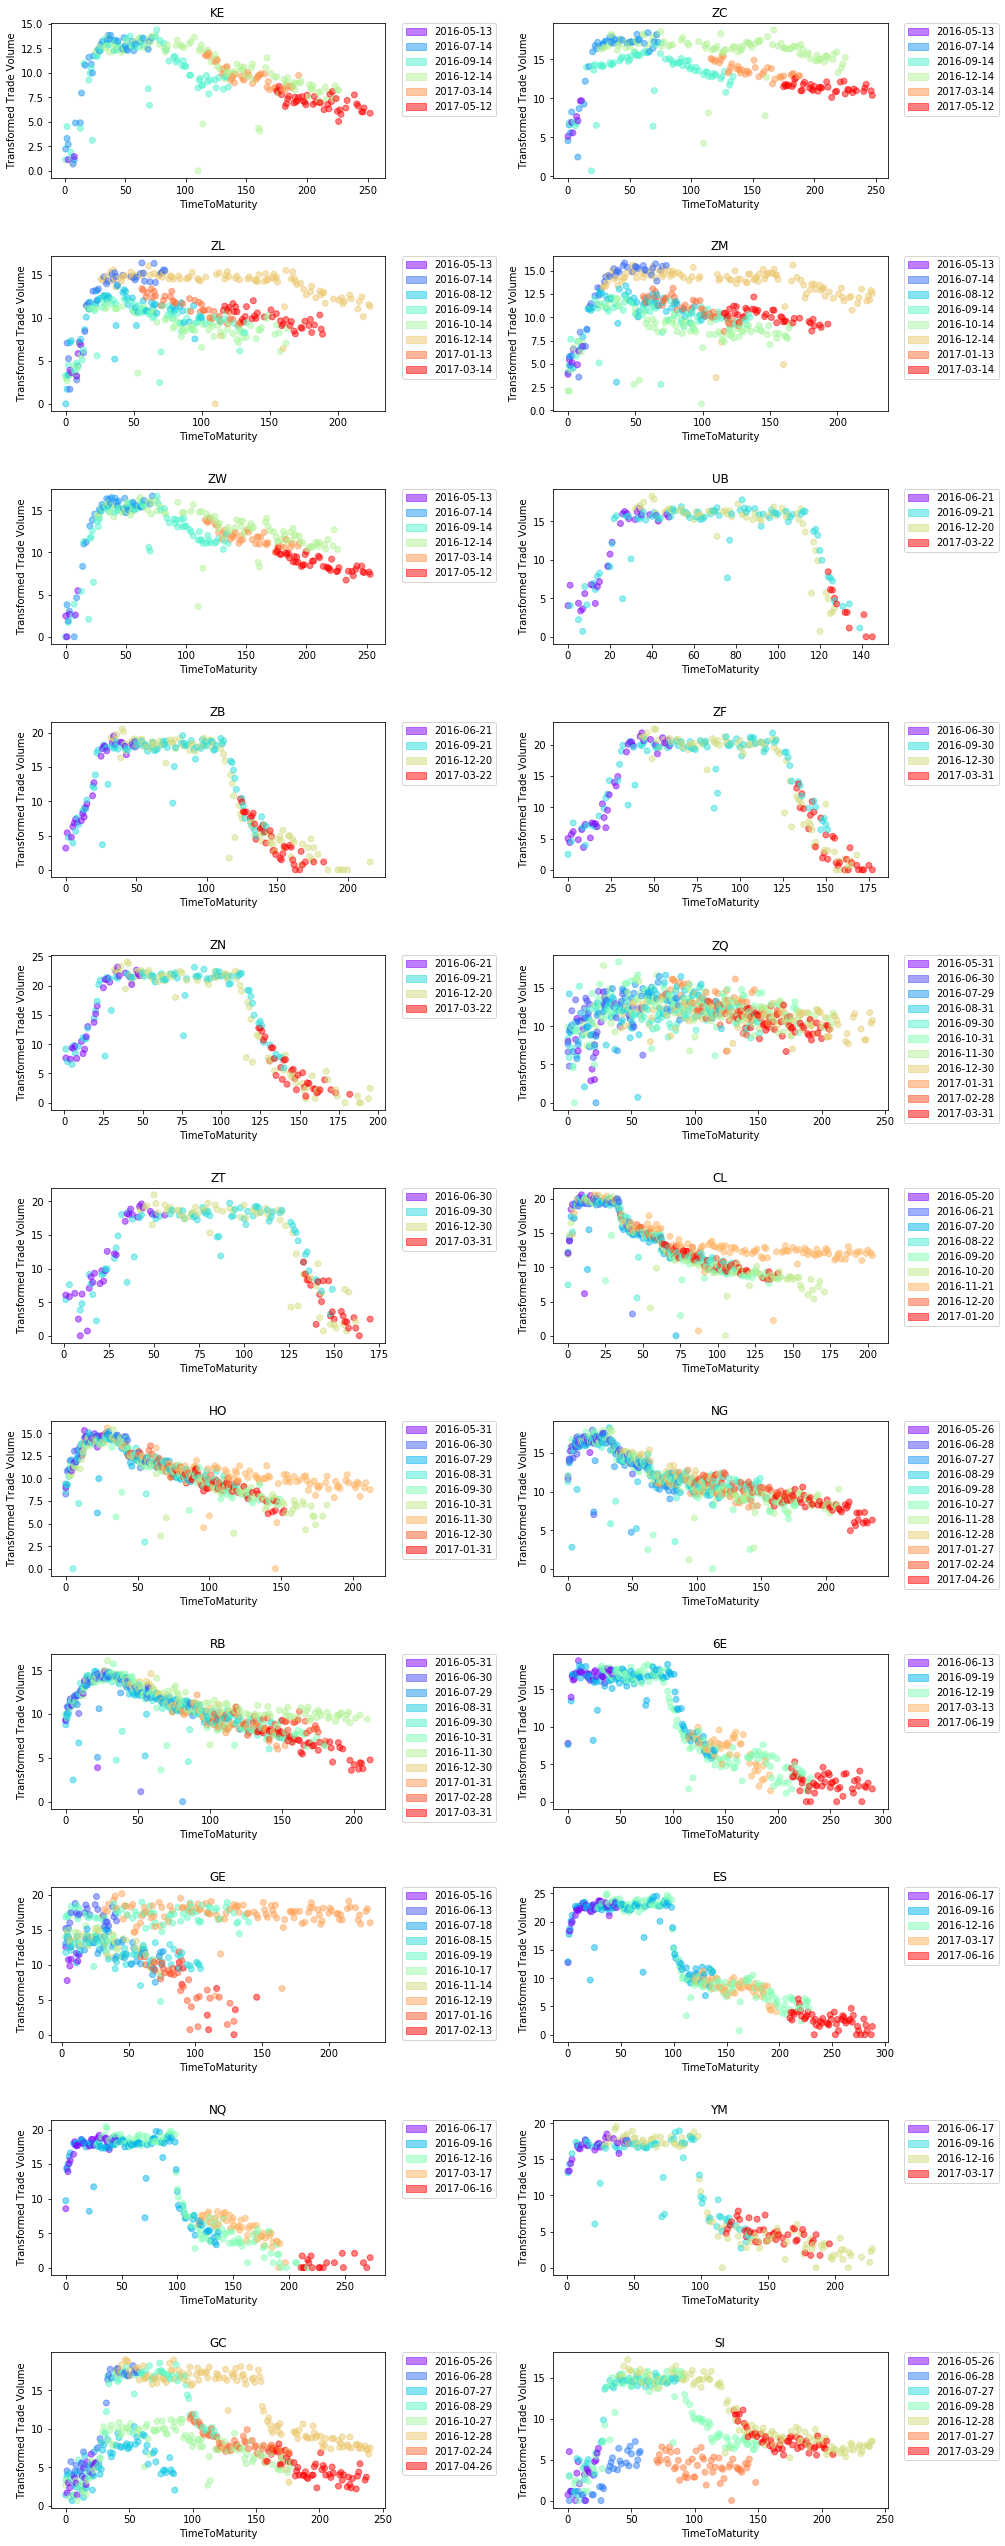

In [6]:
#plots highlighting maturities?
trans=.5  #edgecolor='none'
plt.figure(figsize=(15, 50))

j=0
for i in np.unique(dataset.ProductType):
    subset0=dataset.loc[dataset.ProductType==i]
    for l in np.unique(subset0.ProductName):
        subset=subset0.loc[subset0.ProductName==l]
        subset=subset.sort_values(by="TimeToMaturity") #not needed since not line grapg
        j=j+1
        plt.subplot(12, 2, j); #np.ceil(len(np.unique(subset.Maturity))/3.0)
        plt.subplots_adjust(hspace=.5);
        plt.subplots_adjust(wspace=.5);
        labs=[np.unique(subset.Maturity).tolist().index(k) for k in subset.Maturity]
        plt.scatter(subset[['TimeToMaturity']], subset[['TradeTotBCTrans']], c=labs, cmap=cm.rainbow, alpha=trans); 
        plt.xlabel('TimeToMaturity'); plt.ylabel('Transformed Trade Volume');
        #plt.plot(subset[['DayofMonth']], subset[['TradeTotBCTrans']], 'tab:gray', alpha=trans)
        plt.title(l);
        
        uCols=np.unique(subset.Maturity)
        cust_hand=[]
        for m in range(len(uCols)):
            cust_hand.append(mpatches.Patch(color=cm.rainbow(np.linspace(0, 1, len(uCols))[m], alpha=trans), label=uCols[m]))
        plt.legend(handles=cust_hand, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('strata_timeToMat.png', bbox_inches='tight') 

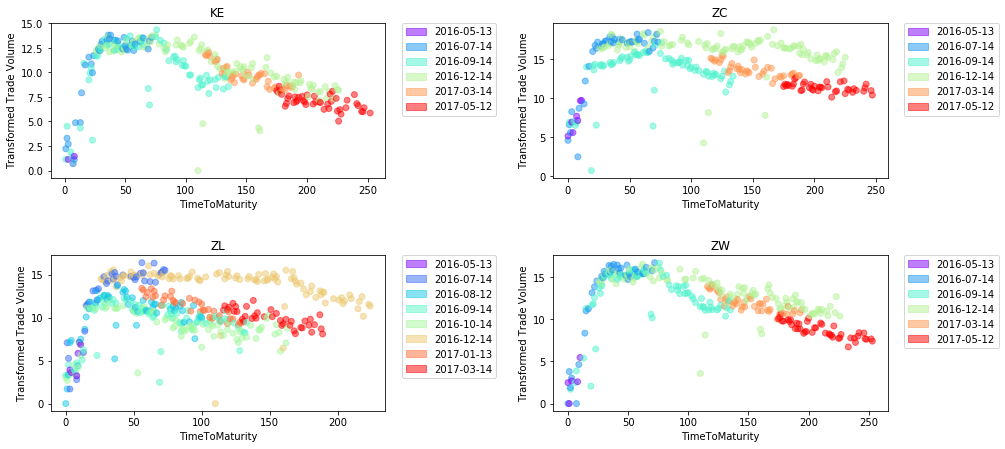

In [12]:
#plots highlighting maturities?
trans=.5  #edgecolor='none'
plt.figure(figsize=(15, 50))

j=0
for i in np.unique(dataset.ProductType):
    subset0=dataset.loc[dataset.ProductType==i]
    for l in ["KE", "ZC", "ZL", "ZW"]:
        subset=subset0.loc[subset0.ProductName==l]
        subset=subset.sort_values(by="TimeToMaturity") #not needed since not line grapg
        j=j+1
        plt.subplot(12, 2, j); #np.ceil(len(np.unique(subset.Maturity))/3.0)
        plt.subplots_adjust(hspace=.5);
        plt.subplots_adjust(wspace=.5);
        labs=[np.unique(subset.Maturity).tolist().index(k) for k in subset.Maturity]
        plt.scatter(subset[['TimeToMaturity']], subset[['TradeTotBCTrans']], c=labs, cmap=cm.rainbow, alpha=trans); 
        plt.xlabel('TimeToMaturity'); plt.ylabel('Transformed Trade Volume');
        #plt.plot(subset[['DayofMonth']], subset[['TradeTotBCTrans']], 'tab:gray', alpha=trans)
        plt.title(l);
        
        uCols=np.unique(subset.Maturity)
        cust_hand=[]
        for m in range(len(uCols)):
            cust_hand.append(mpatches.Patch(color=cm.rainbow(np.linspace(0, 1, len(uCols))[m], alpha=trans), label=uCols[m]))
        plt.legend(handles=cust_hand, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    if l=='ZW':
        break

plt.savefig('strata_timeToMat2.png', bbox_inches='tight')

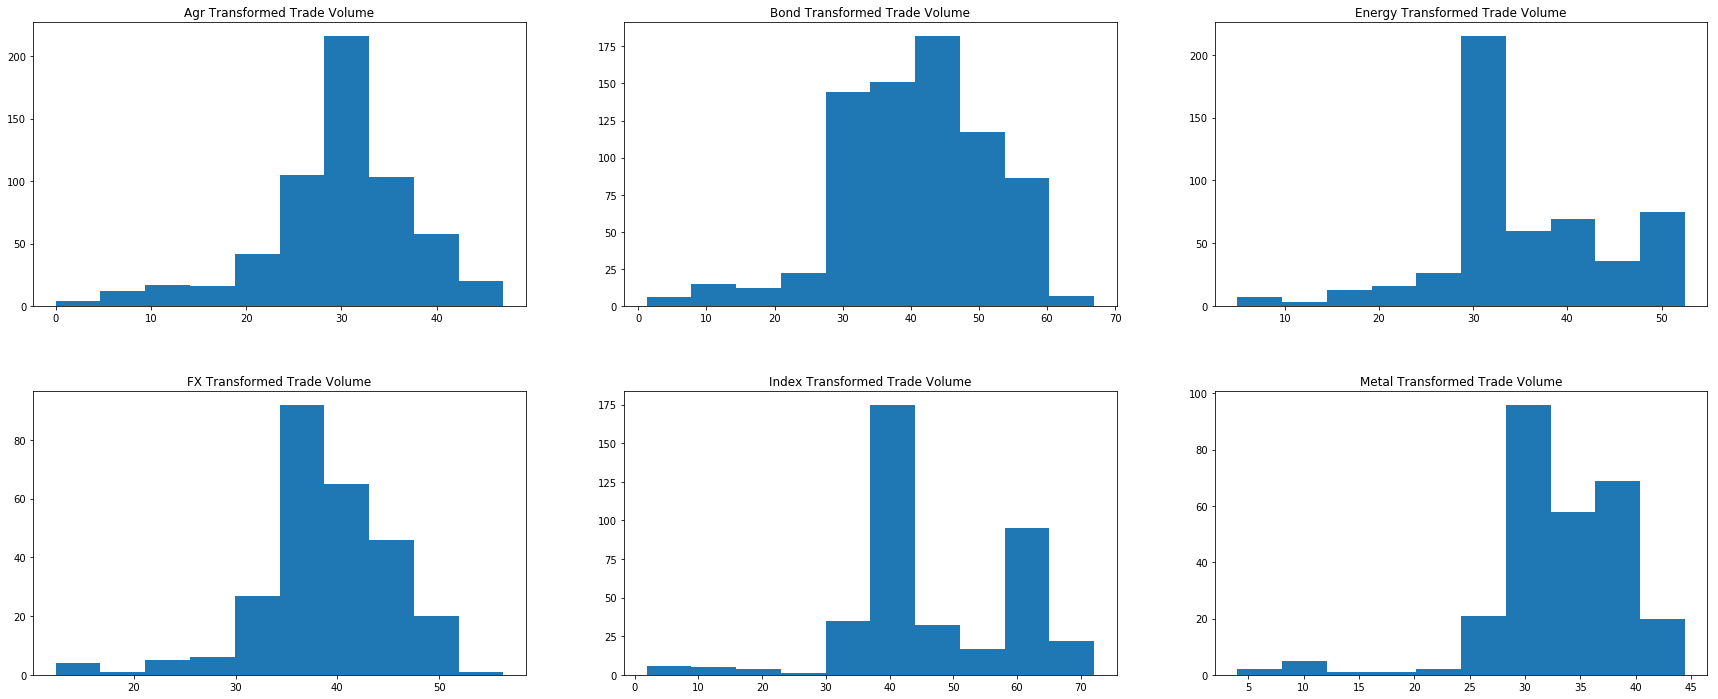

In [269]:
plt.figure(figsize=(30, 12))

for i, j in enumerate(np.unique(df.ProductType)):
    subset=df.loc[df.ProductType==j]
    plt.subplot(2, 3,i+1);
    plt.subplots_adjust(hspace=.3);
    plt.subplots_adjust(wspace=.2);
    plt.hist(subset['TradeTotBCTrans']); plt.title(j+" Transformed Trade Volume");

plt.savefig('strata_types_hist.png', bbox_inches='tight')    

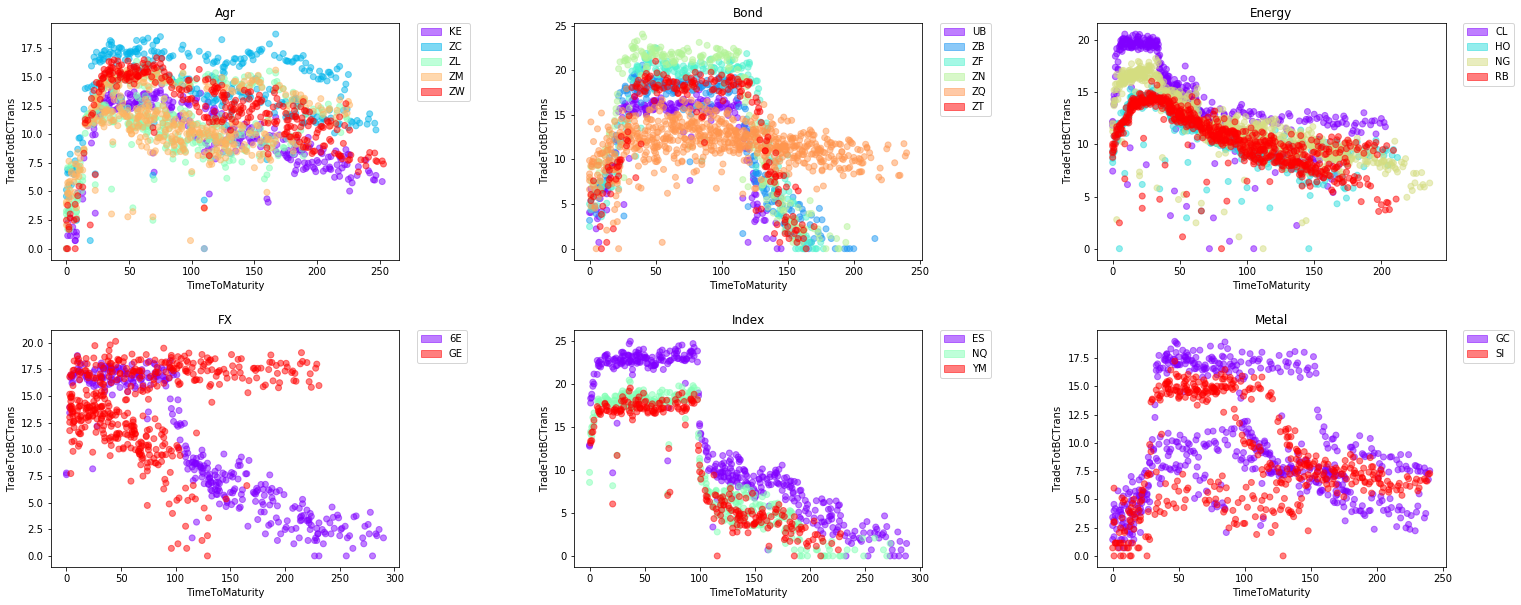

In [16]:
trans=.5  #edgecolor='none'
plt.figure(figsize=(25, 10))
for i, j in enumerate(np.unique(dataset.ProductType)):
    subset=dataset.loc[dataset.ProductType==j]
    uCols=np.unique(subset.ProductName)
    labs=[np.unique(subset.ProductName).tolist().index(k) for k in subset.ProductName]
    plt.subplot(2,3,i+1);
    plt.subplots_adjust(hspace=.3);
    plt.subplots_adjust(wspace=.5);
    plt.scatter(subset[['TimeToMaturity']], subset[['TradeTotBCTrans']], c=labs, cmap=cm.rainbow, alpha=trans); 
    plt.xlabel('TimeToMaturity'); plt.ylabel('TradeTotBCTrans'); plt.title(j);
    
    cust_hand=[]
    for j in range(len(uCols)):
        cust_hand.append(mpatches.Patch(color=cm.rainbow(np.linspace(0, 1, len(uCols))[j], alpha=trans), label=uCols[j]))
    plt.legend(handles=cust_hand, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig('types_time_to_mat.png', bbox_inches='tight')